In [ ]:
#PS2
import numpy as np
#Just some test cases
X = np.array([[1, 1, 0, 1], [1, 1, 1, 1]])
y = np.array([[1],[1]])

sum = (1 / X.shape[0]) * (X.T @ y)

submatrix = X[np.where(y == 1)[0]]

colmatrix = X @ np.array([X[0]]).T

pairwisematrix = X @ X.T

In [ ]:
import numpy as np
hessian = np.array([[2, 0, 0],[0, 2, -2],[0, -2, 10]])
print(np.linalg.eig(hessian))

EigResult(eigenvalues=array([10.47213595,  1.52786405,  2.        ]), eigenvectors=array([[ 0.        ,  0.        ,  1.        ],
       [-0.22975292,  0.97324899,  0.        ],
       [ 0.97324899,  0.22975292,  0.        ]]))


In [ ]:
import numpy as np

def done(cprev, c):
  return (c - cprev).T@(c - cprev) < 1.E-8

def gradient(c):
    dc0 = 2 * (c[0] + 2)
    dc1 = 2 * (c[1] - 3) - 2 * c[2]
    dc2 = 10 * (c[2] + 1) - 2 * c[1]
    return np.array([dc0, dc1, dc2])

def gradDescent(rate):
  #Get a starting C from normal distribution with mean 0 and variance .1
  c = np.random.normal(0, .1 * .1, size=3)
  cprev = c + 1
  updates = 0
  while not done(cprev, c):
    cprev = c.copy() #If we do not do copy, then cprev is just a reference to the memory allocated for c
    c = c - rate * gradient(c)
    updates += 1
  return c, updates

learning_rate=.01

result = gradDescent(learning_rate)
print(f"Learning rate = {learning_rate}")
print(f"c = {result[0]}")
print(f"Updates = {result[1]}")


Learning rate = 0.01
c = [-1.99914609  2.49391635 -0.50143616]
Updates = 384


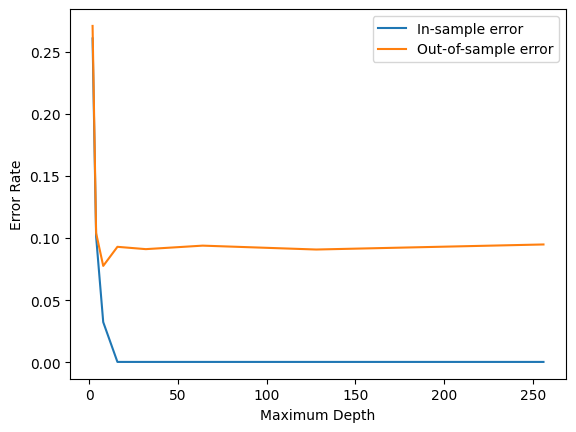

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

D = fetch_openml('DNA', as_frame = False)
X = D.data
y = D.target

depths = []
for i in range(1, 9):
  depths.append(2 ** i)

in_sample_errors = []
cross_validation_errors = []

for depth in depths:
  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(X, y)

  in_sample_accuracy = clf.score(X, y)
  in_sample_errors.append(1 - in_sample_accuracy)

  cv_accuracy = cross_val_score(clf, X, y, cv = 20, scoring = "accuracy")
  #We want to take the mean here because the variable cv_score will store an np array of the accuracy
  cross_validation_errors.append(1 - np.mean(cv_accuracy))

plt.plot(depths, in_sample_errors, label="In-sample error")
plt.plot(depths, cross_validation_errors, label="Out-of-sample error")
plt.xlabel("Maximum Depth")
plt.ylabel("Error Rate")
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

D = fetch_openml(name='dna', version=1, as_frame=False)
X = D.data
y = D.target

#Calculate for the original data set with no transformation
glc = SGDClassifier()
glc.fit(X, y)
original_accuracy = glc.score(X, y)
original_error = 1 - original_accuracy
# Tells us how many classes and how many features for each class as the second value in the shape
capacity1 = glc.coef_.shape[1]
cv_accuracy = cross_val_score(clf, X, y, cv = 10, scoring = "accuracy")
cv_accuracy_mean = np.mean(cv_accuracy)
cv_error = 1 - cv_accuracy_mean

# Create an alternative representation based on quadratic feature mapping for feature transformation
quadratic = PolynomialFeatures()
new_X = quadratic.fit_transform(X)

#Calculating after the transformation
glc2 = SGDClassifier()
glc2.fit(new_X, y)
capacity2 = glc2.coef_.shape[1]
second_accuracy = glc2.score(new_X, y)
second_error = 1 - second_accuracy
cv_accuracy2 = cross_val_score(glc2, new_X, y, cv = 10, scoring = "accuracy")
cv_accuracy_mean2 = np.mean(cv_accuracy2)
cv_error2 = 1 - cv_accuracy_mean2

print("Original")
print(f"Original in-sample Error: {original_error:.3f}")
print(f"Original Capacity (size of parameter vector): {capacity1}")
print(f"Estimated out-of-sample error from cross validation: {cv_error}")

print("After feature transformation ")
print(f"Second in-sample error: {second_error:.3f}")
print(f"Second Capacity (size of parameter vector): {capacity2}")
print(f"Estimated out-of-sample error from cross validation: {cv_error2}")



Original
Original in-sample Error: 0.017
Original Capacity (size of parameter vector): 180
Estimated out-of-sample error from cross validation: 0.08852349125608716
After feature transformation 
Second in-sample error: 0.000
Second Capacity (size of parameter vector): 16471
Estimated out-of-sample error from cross validation: 0.04520317028449772
